In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 722kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.68MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.8MB/s]


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

label: 5


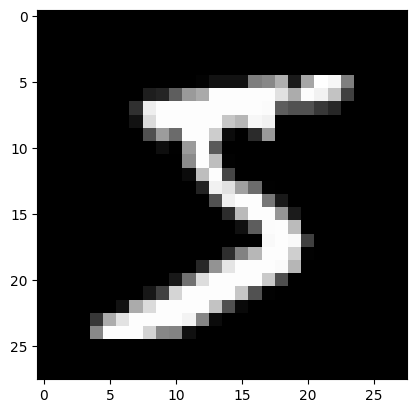

In [6]:
image, label = dataset[0]
plt.imshow(image , cmap='gray')
print('label:', label)

In [7]:
import torchvision.transforms as transforms

In [8]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [9]:
img_tensor, label = dataset[0]
print(img_tensor.shape)
print(label)

torch.Size([1, 28, 28])
5


In [10]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


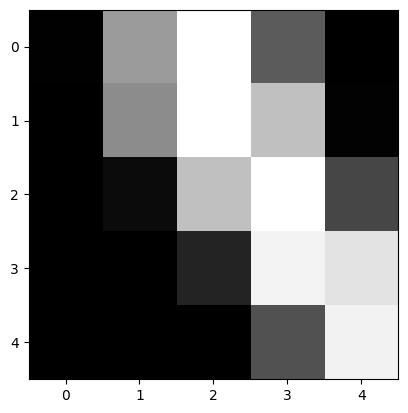

In [11]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [12]:
from torch.utils.data import random_split

train_ds,val_ds = random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [13]:
from torch.utils.data import DataLoader

batch_size=128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)



In [15]:
import torch.nn as nn

input_size=28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [16]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 2.5016e-03,  2.7040e-02, -3.4659e-02,  ...,  3.6011e-03,
          3.4534e-02,  2.8393e-02],
        [-2.1815e-03, -1.3580e-02,  3.1821e-02,  ...,  2.0861e-02,
          3.4012e-02, -1.7925e-03],
        [-2.2432e-02, -8.2926e-04, -1.6221e-02,  ..., -3.5599e-02,
         -1.7287e-02,  3.4413e-02],
        ...,
        [ 5.9790e-03, -1.8130e-02,  1.5554e-02,  ..., -3.0684e-02,
          1.6292e-03, -1.6754e-02],
        [ 2.5393e-02, -1.5810e-03, -6.0592e-03,  ..., -1.2649e-02,
         -3.2006e-02, -9.4838e-04],
        [-2.6087e-02,  3.0420e-05,  7.2260e-04,  ..., -3.1869e-02,
          1.6469e-02,  1.4712e-02]], requires_grad=True)

In [17]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0232, -0.0127,  0.0101,  0.0296, -0.0118, -0.0081, -0.0331,  0.0271,
         0.0075, -0.0316], requires_grad=True)

In [20]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([8, 1, 1, 6, 1, 9, 3, 5, 6, 7, 7, 8, 1, 0, 6, 2, 1, 3, 1, 1, 6, 1, 5, 1,
        4, 8, 9, 1, 0, 5, 3, 1, 5, 1, 2, 7, 5, 6, 4, 3, 8, 8, 0, 4, 8, 6, 8, 6,
        0, 7, 5, 6, 5, 3, 8, 2, 9, 7, 6, 1, 1, 3, 7, 0, 3, 2, 9, 9, 3, 5, 8, 2,
        9, 0, 4, 9, 0, 4, 9, 3, 8, 1, 3, 2, 1, 9, 0, 1, 6, 6, 0, 3, 2, 2, 2, 0,
        0, 5, 8, 6, 0, 6, 0, 1, 4, 7, 2, 9, 5, 9, 8, 0, 5, 2, 3, 7, 1, 7, 6, 2,
        1, 1, 5, 3, 5, 9, 9, 0])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [21]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [27]:
class MnistModel(nn.Module):
  def __init__(self):
     super().__init__()
     self.linear = nn.Linear(input_size, num_classes)

  def forward(self,xb):
       xb = xb.reshape(-1,784)
       out = self.linear(xb)
       return out

model = MnistModel()


In [28]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [29]:
for images, labels in train_loader:
   outputs = model(images)
   break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1405, -0.0995,  0.2406,  0.0340,  0.1408, -0.0358,  0.5100, -0.0867,
         -0.2035, -0.2361],
        [ 0.6503, -0.3430,  0.0149, -0.0503,  0.3699, -0.0638,  0.2307, -0.1147,
          0.4433, -0.3750]])
